# Videogame sales analysis 1980-2015

Author: Orhan Taskopru <br>
Date created: 31-01-2021 <br>
Data source: https://www.kaggle.com/gregorut/videogamesales <br>



The data is scraped by the following platform: <br>
http://www.vgchartz.com/
<a id='top'></a>

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import wordcloud
from wordcloud import WordCloud

In [52]:
df= pd.read_csv("vgsales.csv")

In [53]:
df=df[df.Year != 2016.0]
df=df[df.Year != 2017.0]
df=df[df.Year != 2020.0]
df=df.reset_index(drop=True)
df['Year'].fillna((df['Year'].mean()), inplace=True)
df = df.astype({"Year": int})
df


#region toevoegen aan search def
#year werkt niet
#df namen veranderen
#check kaggle voor inspiratie
#index
#conclusies
#machine learning?

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16245,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16246,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16247,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16248,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [54]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.193785,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.667011,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [55]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       56
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16250 entries, 0 to 16249
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          16250 non-null  int32  
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


In [60]:
def search(x):
    #This function filters the dataframe based on:
    #Index (1-16250), name, year, platform and publisher
    #Input is case sensitive
    if df.loc[df['Name']==x].shape[0] > 0:
        return df.loc[df['Name']==x]
    elif df.loc[df['Platform']==x].shape[0] > 0:
        return df.loc[df['Platform']==x]
    elif df.loc[df['Year']==x].shape[0] > 0:
        return df.loc[df['Year']==x]
    elif df.loc[df['Genre']==x].shape[0] > 0:
        return df.loc[df['Genre']==x]
    elif df.loc[df['Publisher']==x].shape[0] > 0:
        return df.loc[df['Publisher']==x]
    elif int(x) in range(16250):
        return df.iloc[[x]]
    else:
        return print('Result not found in dataframe(input is case sensitive, index range is 0-16249)')         

In [62]:
search('2006')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2006,2023,The Simpsons Game,Wii,2007,Action,Electronic Arts,0.45,0.47,0.0,0.11,1.03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [7]:
df2=df.groupby('Platform').sum()
df2=df2.sort_values(by='Global_Sales' ,ascending=False)
df2=df2[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
df2.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.64
X360,600.69,280.18,12.43,85.47,979.13
PS3,391.86,342.91,78.86,141.71,955.25
Wii,507.71,268.38,69.35,80.61,926.71
DS,390.44,194.65,175.57,60.51,822.20


In [8]:
df3=df.groupby('Genre').sum()
df3=df3.sort_values(by='Global_Sales' ,ascending=False)
df3=df3[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
df3.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,871.96,518.64,154.15,185.55,1731.26
Sports,678.78,369.49,134.59,133.05,1316.33
Shooter,575.16,305.57,37.67,100.27,1019.15
Role-Playing,325.89,186.77,348.64,59.17,920.57
Platform,446.26,200.76,130.66,51.28,829.30


In [9]:
df4=df.groupby('Publisher').sum()
df4=df4.sort_values(by='Global_Sales' ,ascending=False)
df4=df4[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
df4.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.71,417.81,454.25,95.13,1783.09
Electronic Arts,591.43,364.36,13.95,128.14,1098.07
Activision,428.03,214.14,6.40,74.90,723.79
Sony Computer Entertainment,262.79,184.85,73.88,79.40,600.94
Ubisoft,249.31,158.94,7.26,48.96,464.67


In [10]:
df5=df.groupby('Year').sum()
df5=df5.sort_values(by='Year' ,ascending=True)
df5=df5[['NA_Sales','EU_Sales','JP_Sales','Global_Sales']]
df5 

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Year,,,,
1980.0,10.59,0.67,0.00,11.38
1981.0,33.40,1.96,0.00,35.77
1982.0,26.92,1.65,0.00,28.86
1983.0,7.76,0.80,8.10,16.79
1984.0,33.28,2.10,14.27,50.36
1985.0,33.73,4.74,14.56,53.94
1986.0,12.50,2.84,19.81,37.07
1987.0,8.46,1.41,11.63,21.74
1988.0,23.87,6.59,15.76,47.22


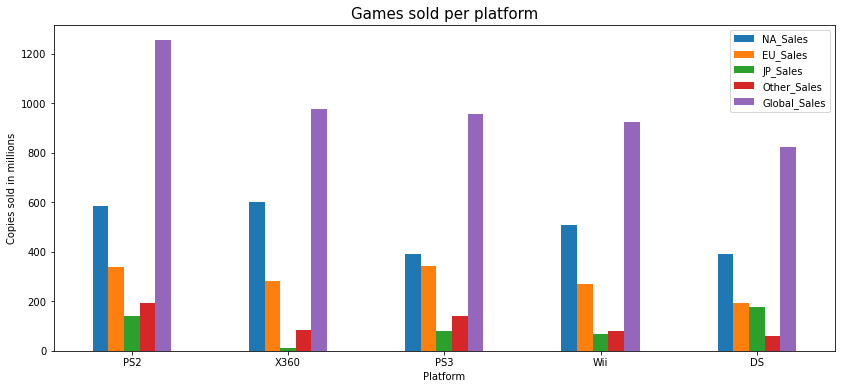

In [11]:
df2.head().plot(kind='bar', figsize=(14,6), rot=360)
plt.xlabel('Platform')
plt.ylabel('Copies sold in millions')
plt.title("Games sold per platform", fontsize=15)
plt.show()

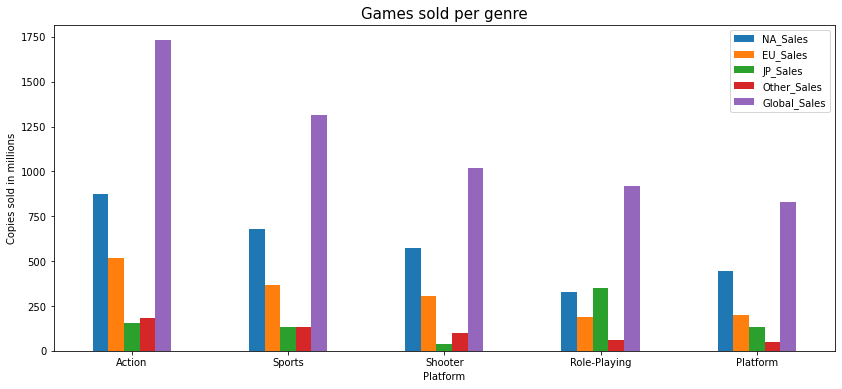

In [12]:
df3.head().plot(kind='bar', figsize=(14,6), rot=360)
plt.xlabel('Platform')
plt.ylabel('Copies sold in millions')
plt.title("Games sold per genre", fontsize=15)
plt.show()

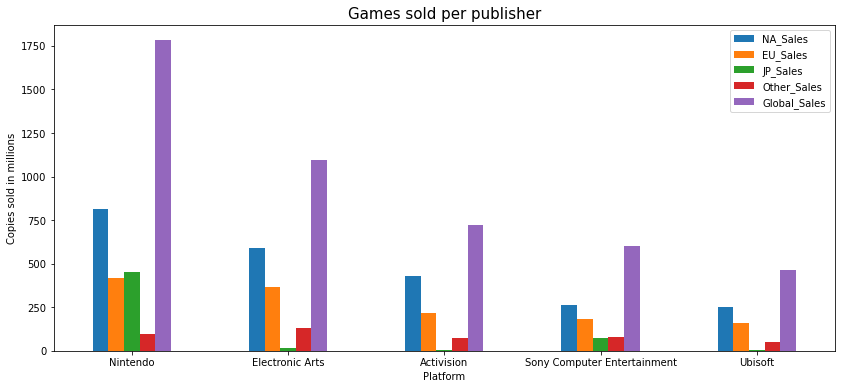

In [13]:
df4.head().plot(kind='bar', figsize=(14,6), rot=360)
plt.xlabel('Platform')
plt.ylabel('Copies sold in millions')
plt.title("Games sold per publisher", fontsize=15)
plt.show()

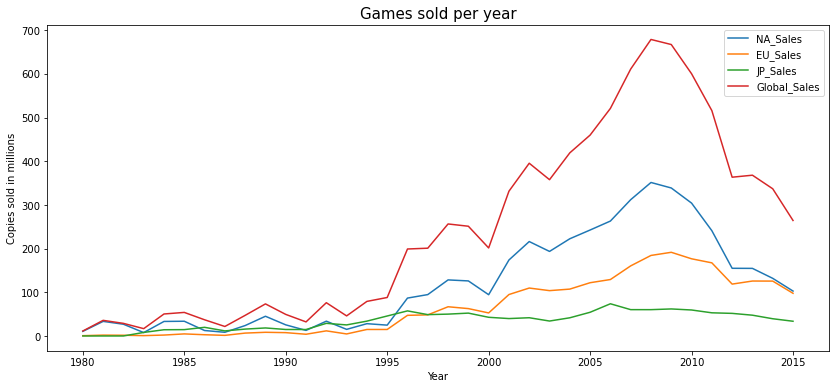

In [14]:
df5.plot(figsize=(14,6))
plt.xlabel('Year')
plt.ylabel('Copies sold in millions')
plt.title("Games sold per year", fontsize=15)
plt.show()